In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import generate_data as gen_d

sns.set_style("white")
%matplotlib inline

# Exploration

In [2]:
df = pd.read_csv("blackjack.csv")

In [3]:
df.shape

(70000, 18)

In [4]:
df.describe()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_inital,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy
count,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.0,6.530743,14.557543,0.410043,0.560286,18.096514,0.178486,14.552786,0.572486,0.845100,19.892400,0.295114,0.543814,0.073129,0.383057,0.500000
std,0.0,3.153388,4.078590,0.491845,0.774488,4.351632,0.382924,4.082299,0.494721,0.899732,3.869239,0.456097,0.498080,0.260349,0.486136,0.500004
min,4.0,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4.000000,12.000000,0.000000,0.000000,16.000000,0.000000,12.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,7.000000,15.000000,0.000000,0.000000,19.000000,0.000000,15.000000,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,4.0,10.000000,18.000000,1.000000,1.000000,21.000000,0.000000,18.000000,1.000000,1.000000,22.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.0,10.000000,21.000000,1.000000,6.000000,26.000000,1.000000,21.000000,1.000000,6.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Repeated trials

In [108]:
# Simulate trials of 100 games
def sim_trial():
    ran = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=0))
    ran = ran[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(ran)
    ran = pd.DataFrame(ran, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    rec = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=1))
    rec = rec[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(rec)
    rec = pd.DataFrame(rec, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    sub = pd.concat([ran, rec])
    return sub

In [109]:
def n_trials(n=5000):
    trials = sim_trial()
    for _ in range(n-1):
        trials = pd.concat([trials, sim_trial()])
        
    return trials

In [138]:
trials = pd.read_csv("trials.csv")

In [139]:
trials.shape

(40000, 6)

In [140]:
trials.describe()

,dealer_busts,player_busts,player_loses,draw,player_wins,strategy
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.176997,0.295783,0.546092,0.071454,0.382454,0.500000
std,0.071274,0.182181,0.074269,0.036907,0.071236,0.500006
min,0.000000,0.000000,0.240000,0.000000,0.100000,0.000000
25%,0.120000,0.120000,0.500000,0.040000,0.340000,0.000000
50%,0.180000,0.260000,0.540000,0.060000,0.380000,0.500000
75%,0.220000,0.460000,0.600000,0.100000,0.420000,1.000000
max,0.460000,0.820000,0.860000,0.280000,0.680000,1.000000


## Difference between losing, drawing and winning

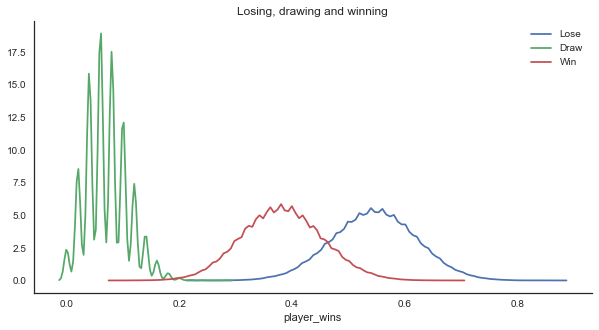

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses, hist=False, label="Lose");
sns.distplot(trials.draw, hist=False, label="Draw");
sns.distplot(trials.player_wins, hist=False, label="Win");
ax.set_title("Losing, drawing and winning");
sns.despine();

## Losses

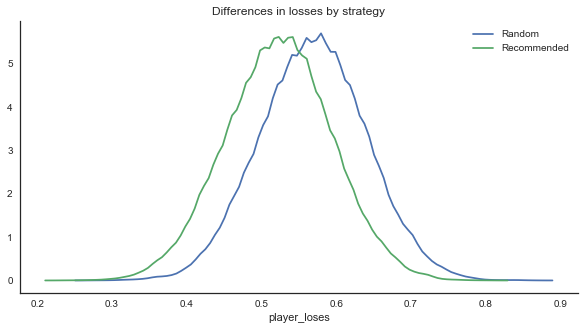

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_loses[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in losses by strategy");
sns.despine();

## Draws

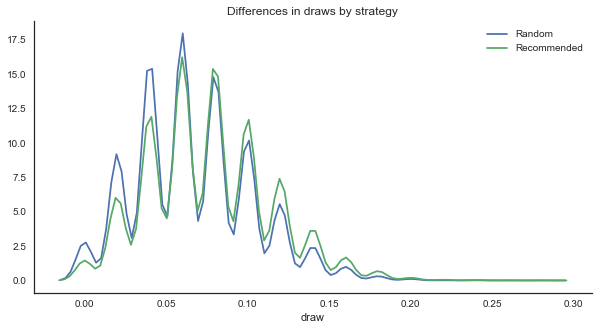

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.draw[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.draw[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in draws by strategy");
sns.despine();

## Wins

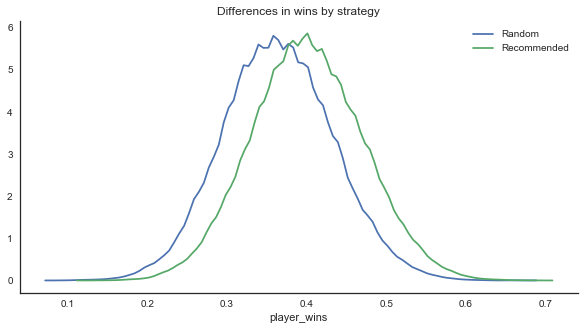

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_wins[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_wins[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in wins by strategy");
sns.despine();

## Player busting

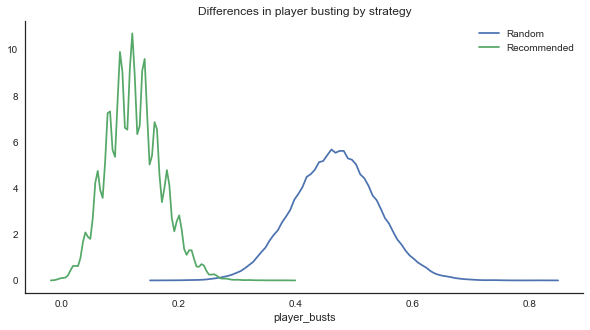

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in player busting by strategy");
sns.despine();

## Dealer busting

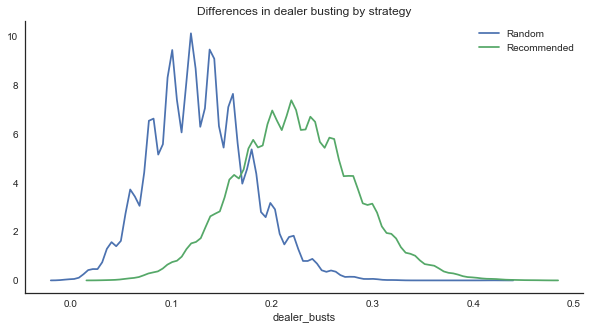

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.dealer_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.dealer_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in dealer busting by strategy");
sns.despine();

# Statistical testing

![t-test](https://camo.githubusercontent.com/3fe864d148f460fadd369d42645f60feebe77672/687474703a2f2f696d616765732e7475746f7276697374612e636f6d2f636d732f696d616765732f3131332f742d746573742d666f726d756c612e706e67)

## Is the difference in the 'rate' of losing between strategies statistically significant?

In [176]:
ran_lose = trials.player_loses[trials.strategy==0]
rec_lose = trials.player_loses[trials.strategy==1]
tt = (np.mean(ran_lose)-np.mean(rec_lose)) / np.sqrt((np.var(ran_lose)/len(ran_lose))+(np.var(rec_lose)/len(rec_lose)))
pval = stats.t.sf(abs(tt), len(rec_lose))
print ("{:.2f}, {:.10f}".format(tt, pval))

65.52, 0.0000000000


## Is the difference in the 'rate' of winning between strategies statistically significant?

In [177]:
ran_win = trials.player_wins[trials.strategy==0]
rec_win = trials.player_wins[trials.strategy==1]
tt = (np.mean(ran_win)-np.mean(rec_win)) / np.sqrt((np.var(ran_win)/len(ran_win))+(np.var(rec_win)/len(rec_win)))
pval = stats.t.sf(abs(tt), len(rec_win))
print ("{:.2f}, {:.10f}".format(tt, pval))

-53.48, 0.0000000000


## Is the difference in the 'rate' of busting between strategies statistically significant?

In [178]:
ran_busts = trials.player_busts[trials.strategy==0]
rec_busts = trials.player_busts[trials.strategy==1]
tt = (np.mean(ran_busts)-np.mean(rec_busts)) / np.sqrt((np.var(ran_busts)/len(ran_busts))+(np.var(rec_busts)/len(rec_busts)))
pval = stats.t.sf(abs(tt), len(rec_busts))
print ("{:.2f}, {:.10f}".format(tt, pval))

572.16, 0.0000000000
